In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import OneCycleLR
from tsai.basics import *

v:\Git\Donguri\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
my_setup()

os              : Windows-10-10.0.19045-SP0
python          : 3.9.19
tsai            : 0.3.9
fastai          : 2.7.14
fastcore        : 1.5.32
torch           : 2.1.2+cu118
device          : 1 gpu (['NVIDIA GeForce GTX 1080 Ti'])
cpu cores       : 4
threads per cpu : 2
RAM             : 31.94 GB
GPU memory      : [11.0] GB


In [3]:
set_seed(137, False)

# Global variables

In [4]:
num_tickers = 14
split_method = "custom"
weighted = ""
full = False

# Data

In [5]:
test_df = pd.read_csv(f"data/for_model/test_{split_method}_scaled.csv")
if split_method == "custom":
    test_df = test_df.drop("Timestamp", axis=1)
test_df

,BP_Real Upper Band,BP_Real Middle Band,BP_Real Lower Band,BP_treasuryStock,BP_inventory,BP_investments,BP_totalNonCurrentAssets,CMCSA_Real Upper Band,CMCSA_Real Middle Band,CMCSA_Real Lower Band,...,IBM_Close,INTC_Close,MAA_Close,ORCL_Close,PG_Close,QCOM_Close,STZ_Close,UL_Close,VZ_Close,XOM_Close
0,1.982502,2.165628,2.196807,0.872219,0.156092,0.0,-1.266852,1.219122,1.121887,1.001888,...,-0.529470,-0.173568,0.950167,3.806676,2.009808,0.941915,1.598494,0.511607,-2.059969,1.729116
1,1.986375,2.169314,2.200034,0.872219,0.156092,0.0,-1.266852,1.236642,1.134307,1.008345,...,-0.578932,-0.269030,0.965524,3.698230,1.955514,0.896785,1.561737,0.492337,-2.058586,1.616245
2,1.989981,2.175803,2.208999,0.872219,0.156092,0.0,-1.266852,1.249192,1.145546,1.017995,...,-0.578128,-0.342165,0.995748,3.672647,1.917714,0.894720,1.492051,0.469856,-2.087617,1.744000
3,1.993382,2.179986,2.213703,0.872219,0.156092,0.0,-1.266852,1.258722,1.155244,1.027826,...,-0.547968,-0.329078,0.998917,3.760517,1.932491,0.895310,1.488350,0.434528,-2.071028,1.845708
4,2.002521,2.185958,2.216002,0.872219,0.156092,0.0,-1.266852,1.265846,1.164412,1.039283,...,-0.512983,-0.299054,0.962111,3.767747,1.906031,0.912418,1.512855,0.424894,-2.095912,1.763226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.659913,2.602840,2.354984,0.872219,0.056774,0.0,-1.652325,1.118005,1.164212,1.209120,...,1.095137,-0.102742,0.617451,4.019120,2.028365,2.700190,1.554334,0.021301,-1.166910,2.486346
167,2.686324,2.621402,2.364117,0.872219,0.056774,0.0,-1.652325,1.092128,1.153221,1.215336,...,1.054119,-0.055011,0.580889,3.950715,2.032488,2.657421,1.506856,0.015948,-1.112994,2.443554
168,2.692614,2.639942,2.393921,0.872219,0.056774,0.0,-1.652325,1.079668,1.143764,1.209413,...,1.154652,-0.058861,0.511664,3.991870,2.049670,2.620255,1.497412,-0.009745,-1.159998,2.382157
169,2.693024,2.660682,2.434062,0.872219,0.056774,0.0,-1.652325,1.070668,1.134740,1.200426,...,1.128513,-0.103512,0.536283,3.883423,2.084377,2.494601,1.491413,0.013807,-1.158615,2.378436


In [6]:
num_y = num_tickers if not full else len(test_df.columns)
test_df = test_df.iloc[:, -num_y:]
test_df

,BP_Real Upper Band,BP_Real Middle Band,BP_Real Lower Band,BP_treasuryStock,BP_inventory,BP_investments,BP_totalNonCurrentAssets,CMCSA_Real Upper Band,CMCSA_Real Middle Band,CMCSA_Real Lower Band,...,IBM_Close,INTC_Close,MAA_Close,ORCL_Close,PG_Close,QCOM_Close,STZ_Close,UL_Close,VZ_Close,XOM_Close
0,1.982502,2.165628,2.196807,0.872219,0.156092,0.0,-1.266852,1.219122,1.121887,1.001888,...,-0.529470,-0.173568,0.950167,3.806676,2.009808,0.941915,1.598494,0.511607,-2.059969,1.729116
1,1.986375,2.169314,2.200034,0.872219,0.156092,0.0,-1.266852,1.236642,1.134307,1.008345,...,-0.578932,-0.269030,0.965524,3.698230,1.955514,0.896785,1.561737,0.492337,-2.058586,1.616245
2,1.989981,2.175803,2.208999,0.872219,0.156092,0.0,-1.266852,1.249192,1.145546,1.017995,...,-0.578128,-0.342165,0.995748,3.672647,1.917714,0.894720,1.492051,0.469856,-2.087617,1.744000
3,1.993382,2.179986,2.213703,0.872219,0.156092,0.0,-1.266852,1.258722,1.155244,1.027826,...,-0.547968,-0.329078,0.998917,3.760517,1.932491,0.895310,1.488350,0.434528,-2.071028,1.845708
4,2.002521,2.185958,2.216002,0.872219,0.156092,0.0,-1.266852,1.265846,1.164412,1.039283,...,-0.512983,-0.299054,0.962111,3.767747,1.906031,0.912418,1.512855,0.424894,-2.095912,1.763226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2.659913,2.602840,2.354984,0.872219,0.056774,0.0,-1.652325,1.118005,1.164212,1.209120,...,1.095137,-0.102742,0.617451,4.019120,2.028365,2.700190,1.554334,0.021301,-1.166910,2.486346
167,2.686324,2.621402,2.364117,0.872219,0.056774,0.0,-1.652325,1.092128,1.153221,1.215336,...,1.054119,-0.055011,0.580889,3.950715,2.032488,2.657421,1.506856,0.015948,-1.112994,2.443554
168,2.692614,2.639942,2.393921,0.872219,0.056774,0.0,-1.652325,1.079668,1.143764,1.209413,...,1.154652,-0.058861,0.511664,3.991870,2.049670,2.620255,1.497412,-0.009745,-1.159998,2.382157
169,2.693024,2.660682,2.434062,0.872219,0.056774,0.0,-1.652325,1.070668,1.134740,1.200426,...,1.128513,-0.103512,0.536283,3.883423,2.084377,2.494601,1.491413,0.013807,-1.158615,2.378436


# Sliding window

In [7]:
fcst_history = 60
fcst_horizon = 5
x_vars = test_df.columns
y_vars = test_df.columns[-num_y:]

X = []
y = []

for i in range(len(test_df) - fcst_history - fcst_horizon + 1):
    x_batch = test_df.iloc[i:i + fcst_history][x_vars].to_numpy().T
    y_batch = test_df.iloc[i + fcst_history:i + fcst_history + fcst_horizon][y_vars].to_numpy().T
    X.append(x_batch)
    y.append(y_batch)

X = np.array(X)
y = np.array(y)
X.shape, y.shape

((107, 112, 60), (107, 112, 5))

In [8]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Move data and model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

# Load model

In [9]:
best_n_layers=4
best_n_heads=6
best_d_model=24
best_d_ff=128
best_attn_dropout=0.0
best_dropout=0.4
best_stride=1
best_patch_len=15

learn = TSForecaster(X, y, splits=None,
    batch_size=None,
    arch="PatchTST",
    arch_config={
        'n_layers':best_n_layers,
        'n_heads':best_n_heads,
        'd_model':best_d_model,
        'd_ff':best_d_ff,
        'attn_dropout':best_attn_dropout,
        'dropout':best_dropout,
        'stride': best_stride,
        'patch_len': best_patch_len,
        'padding_patch': True,
    },
).model
model_path = "models/patchtst_custom_full_5.pth" if full else f"models/patchtst_{split_method}_14_5{weighted}.pth"
learn.load_state_dict(torch.load(model_path))
learn.to(device)
learn.eval()

PatchTST(
  (model): _PatchTST_backbone(
    (revin_layer): RevIN()
    (padding_patch_layer): ReplicationPad1d((1, 0))
    (unfold): Unfold(kernel_size=(1, 15), dilation=1, padding=0, stride=1)
    (backbone): _TSTiEncoder(
      (W_P): Linear(in_features=15, out_features=24, bias=True)
      (dropout): Dropout(p=0.4, inplace=False)
      (layers): ModuleList(
        (0-3): 4 x _TSTiEncoderLayer(
          (self_attn): _MultiheadAttention(
            (W_Q): Linear(in_features=24, out_features=24, bias=True)
            (W_K): Linear(in_features=24, out_features=24, bias=True)
            (W_V): Linear(in_features=24, out_features=24, bias=True)
            (sdp_attn): _ScaledDotProductAttention(
              (attn_dropout): Dropout(p=0.0, inplace=False)
            )
            (to_out): Sequential(
              (0): Linear(in_features=24, out_features=24, bias=True)
              (1): Dropout(p=0.4, inplace=False)
            )
          )
          (dropout_attn): Dropout(p=0.4

In [10]:
with torch.no_grad():
    y_pred = learn(X_tensor)

criterion = nn.MSELoss()
loss = 0
for i in range(num_tickers):
    loss += criterion(y_pred[:, -i-1, :], y_tensor[:, -i-1, :])
print(f'Loss: {loss.item():.4f}')

Loss: 0.2050


# Losses

Loss for 14 features, default split: 0.4997\
Loss for 14 features, custom split: 0.2085\
Loss for 14 features, custom split, weighted: 0.2128\
Loss for all features, custom split, custom loss function (only "prices" have weights, other features have 0 weights during loss calculation): 0.2050

# Graph

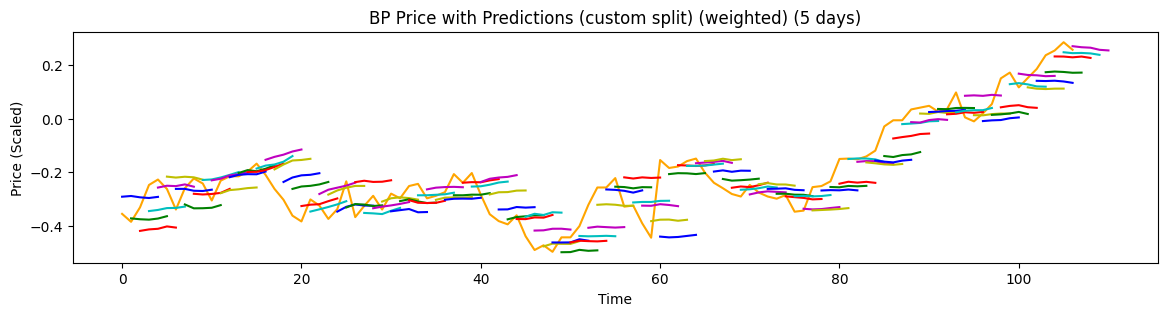

In [13]:
y_true = y[:, -14, :] if full else y[:, 0, :]
y_pred_bp = y_pred[:, -14, :].cpu().data.numpy() if full else y_pred[:, 0, :].cpu().data.numpy()

plt.figure(figsize=(14, 3))
plt.xlabel("Time")
plt.ylabel("Price (Scaled)")
plt.title("BP Price with Predictions (custom split) (weighted) (5 days)")

x = 0
x_plot_true = []
y_plot_true = []
for i in range(len(y_true)):
    x_plot_true.append(x)
    y_plot_true.append(y_true[i][0])
    x += 1
plt.plot(x_plot_true, y_plot_true, color="orange", label="True Values")

colors = ['b', 'g', 'r', 'c', 'm', 'y']  # List of colors to cycle through

x_pred = np.arange(fcst_horizon)
for i in range(len(y_pred_bp)):
    # Select color from the list based on current iteration
    color = colors[i % len(colors)]
    # Plot the current 30 points
    plt.plot(x_pred, y_pred_bp[i], color=color)
    x_pred += 1

plt.show()

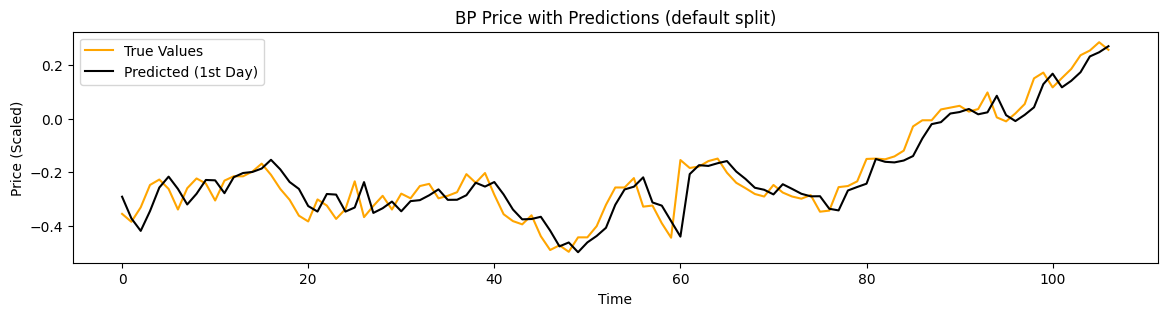

In [15]:
y_true = y[:, -14, :] if full else y[:, 0, :]
y_pred_bp = y_pred[:, -14, :].cpu().data.numpy() if full else y_pred[:, 0, :].cpu().data.numpy()

plt.figure(figsize=(14, 3))
plt.xlabel("Time")
plt.ylabel("Price (Scaled)")
plt.title("BP Price with Predictions (default split)")

x = 0
x_plot_true = []
x_plot_pred = []
y_plot_true = []
y_plot_pred = []
for i in range(len(y_true)):
    x_plot_true.append(x)
    x_plot_pred.append(x)
    y_plot_true.append(y_true[i][0])
    y_plot_pred.append(y_pred_bp[i][0])
    x += 1
plt.plot(x_plot_true, y_plot_true, color="orange", label="True Values")
plt.plot(x_plot_pred, y_plot_pred, color="black", label="Predicted (1st Day)")

plt.legend()
plt.show()

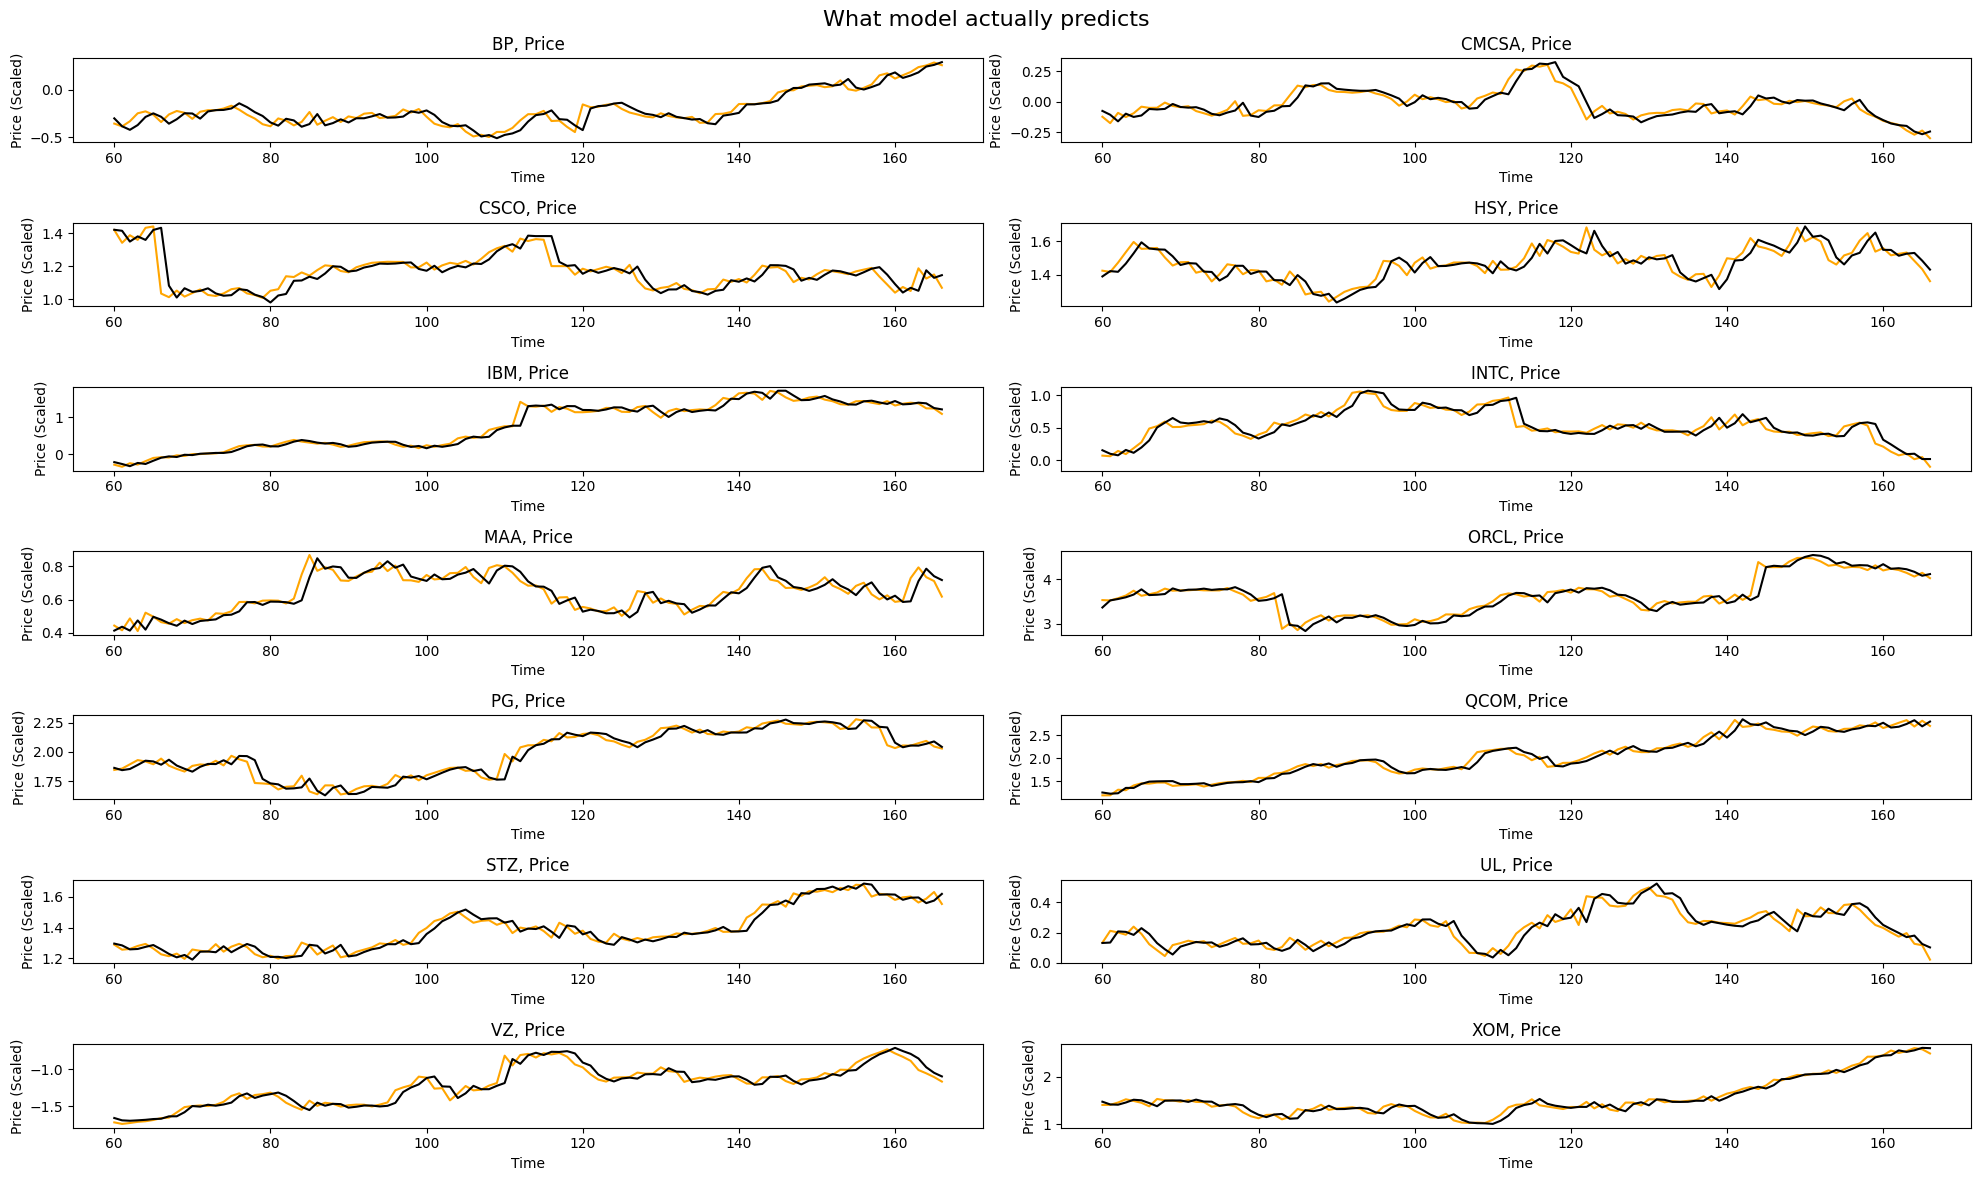

In [13]:
fig, axs = plt.subplots(7, 2, figsize=(20, 12))  # Create a figure with 7 rows and 2 columns
axs = axs.ravel()  # Flatten the array of Axes objects for easy iteration

for i, column in enumerate(test_df.columns):
    # Get the data for the current column
    data = y_true = y[:, i, :]
    y_pred_bp = y_pred[:, i, :].cpu().data.numpy()

    # Plot the data
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Price (Scaled)")
    axs[i].set_title(f"{column.split('_')[0]}, Price")

    x = fcst_history
    x_plot_true = []
    x_plot_pred = []
    y_plot_true = []
    y_plot_pred = []
    for j in range(len(y_true)):
        x_plot_true.append(x)
        x_plot_pred.append(x)
        y_plot_true.append(y_true[j][0])
        y_plot_pred.append(y_pred_bp[j][0])
        x += 1
    axs[i].plot(x_plot_true, y_plot_true, color="orange", label="True Values")
    axs[i].plot(x_plot_pred, y_plot_pred, color="black", label="Predicted (1st Day)")

plt.suptitle("What model actually predicts", fontsize=16)
plt.tight_layout()
plt.show()
